In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import seaborn as sns

import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split



In [0]:
# Functions

# Dataframe Summary
def df_summary(dataframe):
  print('There are {} rows and {} columns\nThe columns are: {} \n\nA summary of the data: \n{}'.format(dataframe.shape[0], dataframe.shape[1], dataframe.columns.values, dataframe.describe()))

# Normalising the data
scaler = MinMaxScaler(feature_range=(0,1))
def df_normalise(dataframe):
  dataframe.iloc[:,0:] = scaler.fit_transform(dataframe.iloc[:,0:])
  return(dataframe)

# Reversing Data
def df_inverse(dataframe):
  dataframe.iloc[:,0:] = scaler.inverse_transform(dataframe.iloc[:,0:])
  return(dataframe)

# check for blanks # Fill blanks
def df_blanks(dataframe):
  if all(dataframe.isnull().sum() == 0) is True:
    print('No blanks found')
  else:
    dataframe.fillna(value=-9999,inplace=True)

## **Importing Data and Initial Analysis**

In [15]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,9,1)

df = web.DataReader("AAPL",'yahoo',start,end)
df_summary(df)

There are 1174 rows and 6 columns
The columns are: ['High' 'Low' 'Open' 'Close' 'Volume' 'Adj Close'] 

A summary of the data: 
              High          Low  ...        Volume    Adj Close
count  1174.000000  1174.000000  ...  1.174000e+03  1174.000000
mean    149.060307   146.452947  ...  3.659776e+07   142.854847
std      37.439704    36.737172  ...  1.816275e+07    38.732422
min      91.669998    89.470001  ...  1.136200e+07    85.651482
25%     115.500000   113.322500  ...  2.421040e+07   107.641609
50%     144.839996   143.230003  ...  3.213910e+07   138.856026
75%     177.275002   174.497501  ...  4.434612e+07   172.632702
max     233.470001   229.779999  ...  1.622063e+08   228.523819

[8 rows x 6 columns]


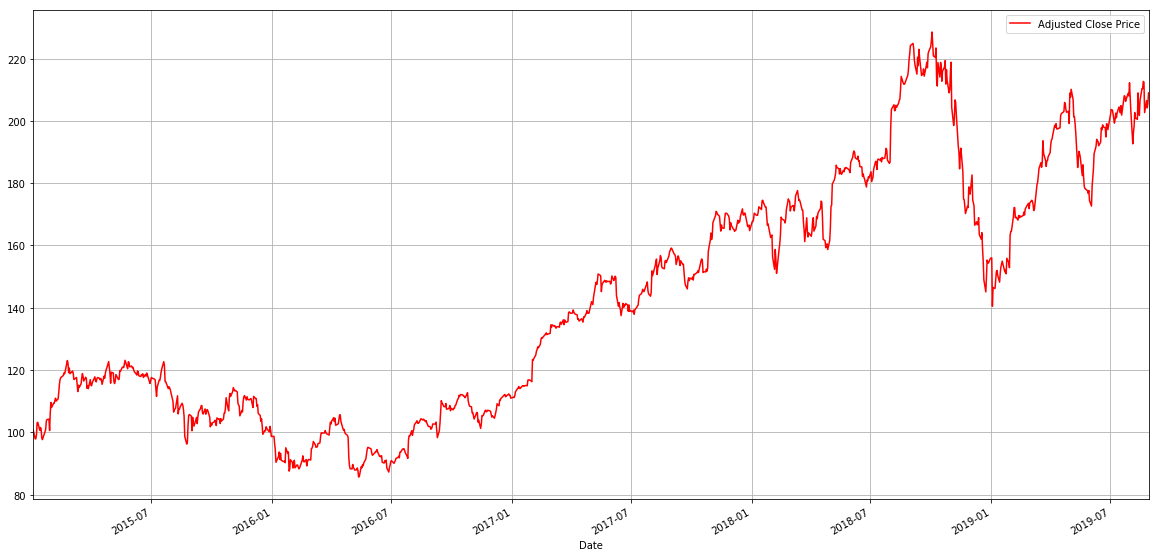

In [120]:
df['Adj Close'].plot(label='Adjusted Close Price', x='Date', y='Adj Close PX', color='red', grid=True).legend(loc='best');

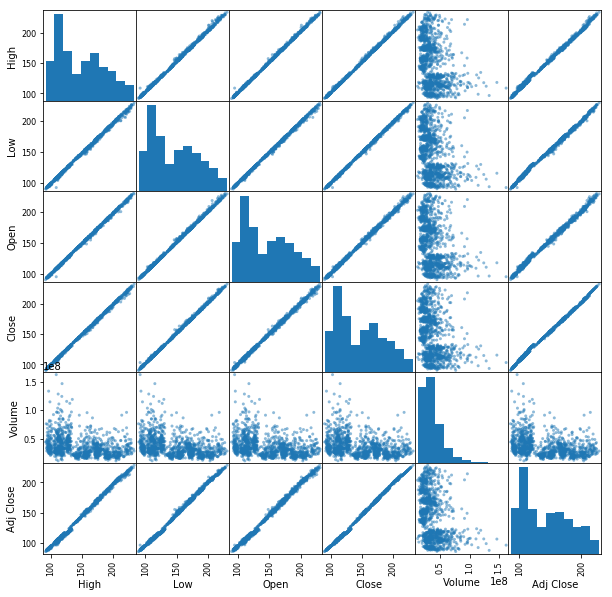

In [17]:
pd.plotting.scatter_matrix(df,figsize=(10,10));

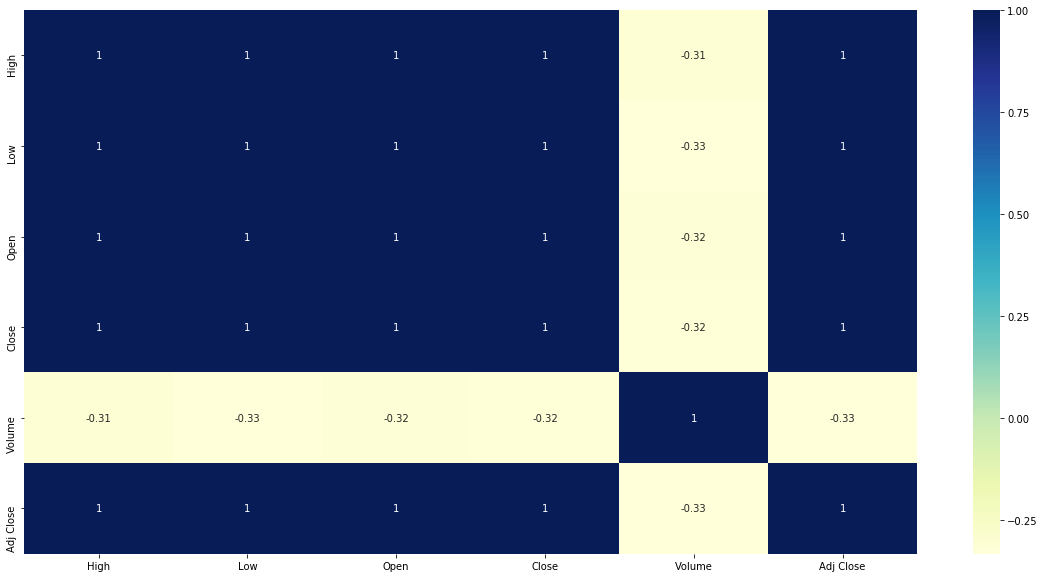

In [18]:
# data correlation
corr = sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

# Data Preprocessing

In [19]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.755898
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.917427
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.926666
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,99.299805
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,103.115128


In [20]:
# pad blanks - fill them with a value as per the df_blanks function
df_blanks(df)

No blanks found


In [100]:
# Creating new dataframe to improve prediction
new_df = df.loc[:,['Open','Close','Volume','Adj Close']]
new_df['HL Percentage'] = (df['High']-df['Low'])/df['Low']* 100.0
# new_df['CO Percentage'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df_summary(new_df)

There are 1174 rows and 5 columns
The columns are: ['Open' 'Close' 'Volume' 'Adj Close' 'HL Percentage'] 

A summary of the data: 
              Open        Close        Volume    Adj Close  HL Percentage
count  1174.000000  1174.000000  1.174000e+03  1174.000000    1174.000000
mean    147.748612   147.787547  3.659776e+07   142.854847       1.786125
std      37.061492    37.077421  1.816275e+07    38.732422       1.095082
min      90.000000    90.339996  1.136200e+07    85.651482       0.439407
25%     114.309998   114.237499  2.421040e+07   107.641609       1.091069
50%     144.034996   143.974998  3.213910e+07   138.856026       1.534369
75%     175.390003   175.842506  4.434612e+07   172.632702       2.184000
max     230.779999   232.070007  1.622063e+08   228.523819      18.260873


In [101]:
# Normalise dataframe
# df_norm = df_normalise(new_df)
df_norm = new_df
df_summary(df_norm)
df_norm.head()

There are 1174 rows and 5 columns
The columns are: ['Open' 'Close' 'Volume' 'Adj Close' 'HL Percentage'] 

A summary of the data: 
              Open        Close        Volume    Adj Close  HL Percentage
count  1174.000000  1174.000000  1.174000e+03  1174.000000    1174.000000
mean    147.748612   147.787547  3.659776e+07   142.854847       1.786125
std      37.061492    37.077421  1.816275e+07    38.732422       1.095082
min      90.000000    90.339996  1.136200e+07    85.651482       0.439407
25%     114.309998   114.237499  2.421040e+07   107.641609       1.091069
50%     144.034996   143.974998  3.213910e+07   138.856026       1.534369
75%     175.390003   175.842506  4.434612e+07   172.632702       2.184000
max     230.779999   232.070007  1.622063e+08   228.523819      18.260873


,Open,Close,Volume,Adj Close,HL Percentage
Date,,,,,
2015-01-02,111.389999,109.330002,53204600.0,100.755898,3.809971
2015-01-05,108.290001,106.250000,64285500.0,97.917427,3.073710
2015-01-06,106.540001,106.260002,65797100.0,97.926666,2.676100
2015-01-07,107.199997,107.750000,40105900.0,99.299805,1.405811
2015-01-08,109.230003,111.889999,59364500.0,103.115128,3.173877


In [102]:
#Split into training and validation data
# Total rows were 1174. 75% = 880
train = df_norm[:880] # Training and testing data. To be used for train_test_split #
valid = df_norm[880:] #validation data

X =train.drop('Adj Close', axis=1)
y =train['Adj Close']

X_valid =valid.drop('Adj Close', axis=1)
y_valid =valid['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=77)
print ('Train Data size: {}\nTrain Data result: {}\nTest data size: {}\nTest data result: {}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


Train Data size: (748, 4)
Train Data result: (748,)
Test data size: (132, 4)
Test data result: (132,)


In [0]:
def modeling(model):
  model_result = model.predict(X_test)
  print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, model_result).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_result).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_result)).round(4))
  return(model_result)
# Linear Regression
linear_model = LinearRegression(n_jobs=-1).fit(X_train, y_train)

# Knn Regression
knn_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

# Ridge Regression
ridge_model = Ridge().fit(X_train,y_train)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor().fit(X_train,y_train)

In [104]:
model_list = [linear_model,knn_model,ridge_model,gbr_model]
pred_list =[]
for model in model_list:
  pred = modeling(model)
  pred_list.append(pred)


Mean Absolute Error: 1.0124
Mean Squared Error: 1.789
Root Mean Squared Error: 1.3375

Mean Absolute Error: 23.4984
Mean Squared Error: 909.4023
Root Mean Squared Error: 30.1563

Mean Absolute Error: 1.0123
Mean Squared Error: 1.789
Root Mean Squared Error: 1.3375

Mean Absolute Error: 0.5645
Mean Squared Error: 0.7118
Root Mean Squared Error: 0.8437


In [105]:
df_pred = pd.DataFrame(y_test)
# df_pred[['Linear Model']] = pd.DataFrame(pred_list[0])
pred_df = pd.DataFrame((np.array(pred_list).T), columns=['linear_model','knn_model','ridge_model','gbr_model'], index=df_pred.index)
df_pred[['Linear','Knn','Ridge','GBR']]=pred_df[['linear_model','knn_model','ridge_model','gbr_model']]
df_pred.tail(5)

,Adj Close,Linear,Knn,Ridge,GBR
Date,,,,,
2015-10-20,106.179642,107.520347,104.024719,107.518247,106.507910
2017-08-10,150.668503,150.574540,139.513705,150.575515,150.590843
2016-01-26,93.718437,92.126500,108.237757,92.126558,94.178058
2018-02-13,160.643784,159.398050,137.498815,159.396468,160.570393
2015-12-07,110.861244,112.391377,116.993774,112.391528,111.374237


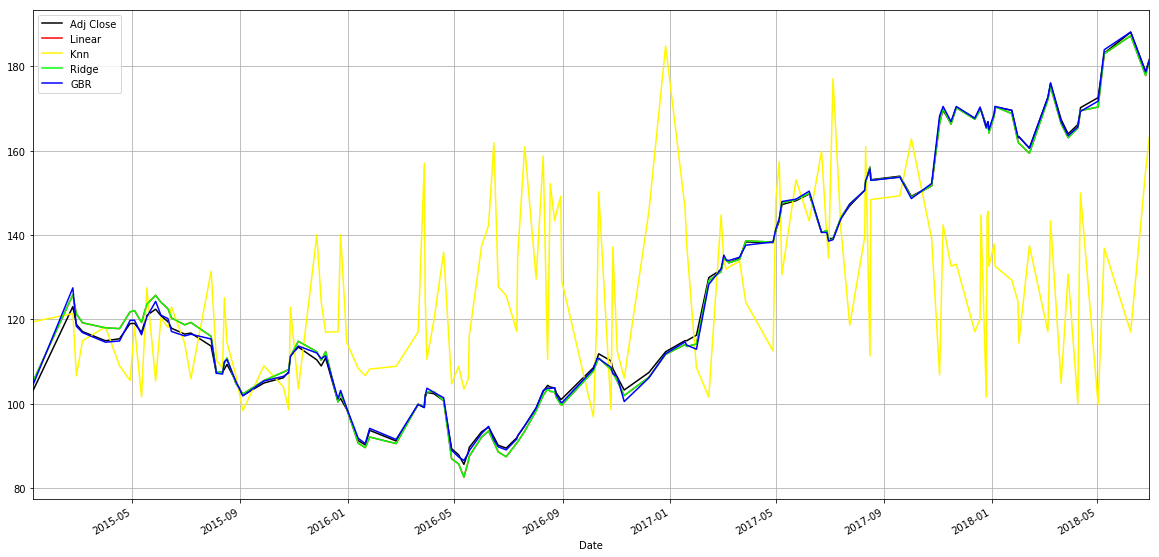

In [115]:
colours = ['#000000','#FF0000','#FFF700','#01FF0A','#0000FF']
columns = ['Adj Close','Linear','Knn','Ridge','GBR']
df_pred[columns].plot(color=colours, grid=True);


*The plot above is a representation of each model's result together with the predicted true **Adjusted Close** value*

# Conclusion

- **Gradient Boosting Regressor** gave the best predictions with a root mean square error of only 0.8437.
- **Linear Regression** gave the second best prediction with a root mean square error of 1.3375
**KNN** (K Nearest Neighbours) was the worst predictor of all the models as shown in the plot above. 